# THE SPARKS FOUNDATION

## AUTHOR : RITIK MAHESHWARI

## TASK1 - Prediction using Supervised ML

This task is based on Supervised Learning. In this task I used Regression technique and analyzed the data with the help of pandas, numpy, matplotlib, sklearn.

## Objective: What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading Data
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# printing first 5 rows data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


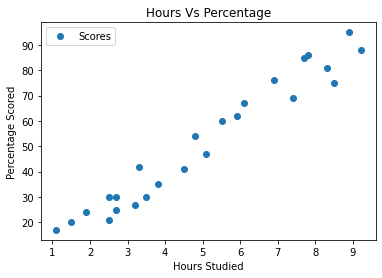

In [5]:
# Plotting distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")

plt.show()

NOTE: We can clearly see that there is a linear relation between hours studied and percentage scored.

## Preparing the data

In [6]:
# Create arrays for features and target variable
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [7]:
# importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
     
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

## Training The Algorithm

In [8]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

print("Training is Complete")

Training is Complete


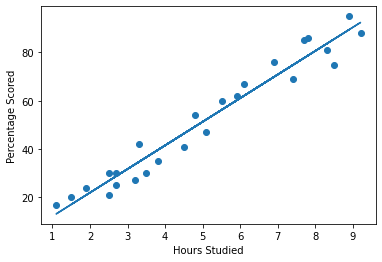

In [9]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

## Prediction

In [10]:
print(X_test)

# Predict on test data
y_pred = reg.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [12]:
# You can also test with your own data
hours = 9.25

# Reshaping the data
hours= np.array(hours).reshape(-1,1)
own_pred = reg.predict(hours)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


## Measuring Model Performance

In [13]:
# import mean_swuared_error
from sklearn.metrics import mean_squared_error

# print R^2 and rmse
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9568211104435257
Root Mean Squared Error: 4.792191274636315


NOTE: here we can see that our model shows 95.6% accuracy.